In [1]:
import numpy as np
import uproot
from matplotlib import pyplot as plt
import matplotlib as mpl
import h5py
from scipy import optimize
from src.process_data import process_data
from src.graph import graph
from src.transmission import transmission
from src.smear import smear
from src.select_tof import select_tof_ptbc, select_tof_fimg
from utils import search_asc, search_desc, xsec_to_ts, tof_to_energy, energy_to_tof, chi_sq

In [2]:
ArIn = h5py.File("temp_data/Ar.hdf5", "r")
ArOut = h5py.File("temp_data/bottle.hdf5", "r")
amp_ArIn = ArIn['amp'][:]
en_ArIn = ArIn['energy'][:]
tof_ArIn = ArIn['tof'][:]
norm_ArIn = ArIn['norm'][0]
detn_ArIn = ArIn['detn'][:]
amp_ArOut = ArOut['amp'][:]
en_ArOut = ArOut['energy'][:]
tof_ArOut = ArOut['tof'][:]
norm_ArOut = ArOut['norm'][0]
detn_ArOut = ArOut['detn'][:]

In [3]:
tof_ArIn_select = select_tof_ptbc(tof_ArIn, detn_ArIn, amp_ArIn)
tof_ArOut_select = select_tof_ptbc(tof_ArOut, detn_ArOut, amp_ArOut)

In [15]:
len(tof_ArIn)

21985130

In [4]:
min(tof_ArIn_select)

700.0306119831712

In [5]:
max(tof_ArIn_select)

99979757.49987884

In [16]:
bg_ArIn_low = 4.515392061366691e-22 * norm_ArIn * (max(tof_ArIn_select) - min(tof_ArIn_select))
bg_ArIn_mid = 1.2737354192853852e-21 * norm_ArIn * (max(tof_ArIn_select) - min(tof_ArIn_select))
bg_ArIn_high = 2.9550661727420935e-21 * norm_ArIn * (max(tof_ArIn_select) - min(tof_ArIn_select))

In [17]:
print(bg_ArIn_low, bg_ArIn_mid, bg_ArIn_high)

24511.886615862244 69144.9551928413 160416.2960473918


In [18]:
bg_ArOut_low = 4.515392061366691e-22 * norm_ArOut * (max(tof_ArIn_select) - min(tof_ArIn_select))
bg_ArOut_mid = 1.2737354192853852e-21 * norm_ArOut * (max(tof_ArIn_select) - min(tof_ArIn_select))
bg_ArOut_high = 2.9550661727420935e-21 * norm_ArOut * (max(tof_ArIn_select) - min(tof_ArIn_select))

In [19]:
print(bg_ArOut_low, bg_ArOut_mid, bg_ArOut_high)

12686.660561000013 35787.47689985899 83026.94640767286


In [21]:
bg_ArIn_low_arr = np.random.uniform(min(tof_ArIn_select),max(tof_ArIn_select), int(bg_ArIn_low))
bg_ArIn_mid_arr = np.random.uniform(min(tof_ArIn_select),max(tof_ArIn_select), int(bg_ArIn_mid))
bg_ArIn_high_arr = np.random.uniform(min(tof_ArIn_select),max(tof_ArIn_select), int(bg_ArIn_high))

In [22]:
bg_ArIn_low_arr

array([34448110.87174532, 90374789.72719386, 30064215.04369988, ...,
       10174576.93650048, 99689092.25852792, 18137221.63650727])

In [23]:
tof_ArIn_select_low = np.append(tof_ArIn_select, bg_ArIn_low_arr)
tof_ArIn_select_mid = np.append(tof_ArIn_select, bg_ArIn_mid_arr)
tof_ArIn_select_high = np.append(tof_ArIn_select, bg_ArIn_high_arr)

In [24]:
bg_ArOut_low_arr = np.random.uniform(min(tof_ArIn_select),max(tof_ArIn_select), int(bg_ArOut_low))
bg_ArOut_mid_arr = np.random.uniform(min(tof_ArIn_select),max(tof_ArIn_select), int(bg_ArOut_mid))
bg_ArOut_high_arr = np.random.uniform(min(tof_ArIn_select),max(tof_ArIn_select), int(bg_ArOut_high))

In [25]:
tof_ArOut_select_low = np.append(tof_ArOut_select, bg_ArOut_low_arr)
tof_ArOut_select_mid = np.append(tof_ArOut_select, bg_ArOut_mid_arr)
tof_ArOut_select_high = np.append(tof_ArOut_select, bg_ArOut_high_arr)

In [43]:
norm_ArIn_low = norm_ArIn + bg_ArIn_low
norm_ArIn_mid = norm_ArIn + bg_ArIn_mid
norm_ArIn_high = norm_ArIn + bg_ArIn_high
norm_ArOut_low = norm_ArOut + bg_ArOut_low
norm_ArOut_mid = norm_ArOut + bg_ArOut_mid
norm_ArOut_high = norm_ArOut + bg_ArOut_high

In [32]:
en_ArIn_select_low = tof_to_energy(tof_ArIn_select_low / 1e9, 182.3, 939.56542, 299792458) * 1e6
en_ArOut_select_low = tof_to_energy(tof_ArOut_select_low / 1e9, 182.3, 939.56542, 299792458) * 1e6
en_ArIn_select_mid = tof_to_energy(tof_ArIn_select_mid / 1e9, 182.3, 939.56542, 299792458) * 1e6
en_ArOut_select_mid = tof_to_energy(tof_ArOut_select_mid / 1e9, 182.3, 939.56542, 299792458) * 1e6
en_ArIn_select_high = tof_to_energy(tof_ArIn_select_high / 1e9, 182.3, 939.56542, 299792458) * 1e6
en_ArOut_select_high = tof_to_energy(tof_ArOut_select_high / 1e9, 182.3, 939.56542, 299792458) * 1e6

In [33]:
logbins = np.logspace(-1, 9, 201)

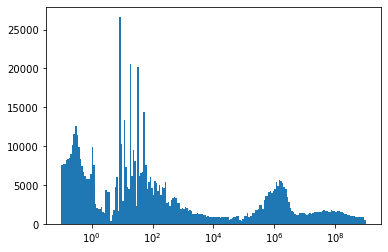

In [34]:
hist_ArIn_low, bins_ArIn_low, _ = plt.hist(en_ArIn_select_low, bins = logbins, range = (0, 1e9))
plt.xscale('log')

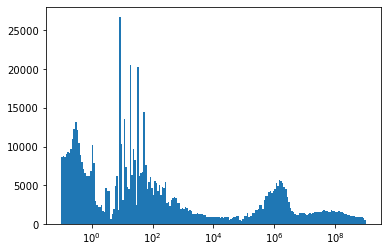

In [35]:
hist_ArIn_mid, bins_ArIn_mid, _ = plt.hist(en_ArIn_select_mid, bins = logbins, range = (0, 1e9))
plt.xscale('log')

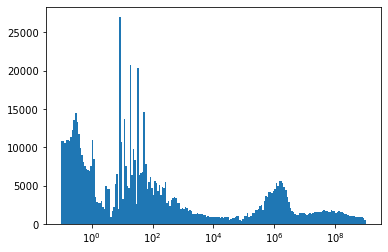

In [36]:
hist_ArIn_high, bins_ArIn_high, _ = plt.hist(en_ArIn_select_high, bins = logbins, range = (0, 1e9))
plt.xscale('log')

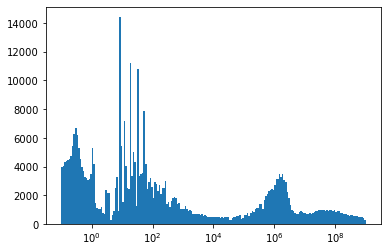

In [37]:
hist_ArOut_low, bins_ArOut_low, _ = plt.hist(en_ArOut_select_low, bins = logbins, range = (0, 1e9))
plt.xscale('log')

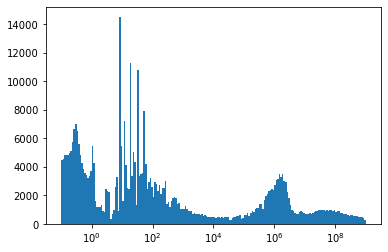

In [38]:
hist_ArOut_mid, bins_ArOut_mid, _ = plt.hist(en_ArOut_select_mid, bins = logbins, range = (0, 1e9))
plt.xscale('log')

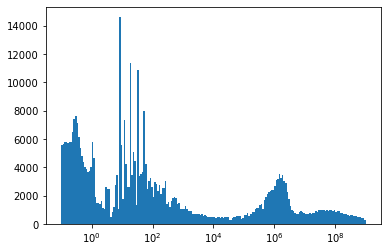

In [39]:
hist_ArOut_high, bins_ArOut_high, _ = plt.hist(en_ArOut_select_high, bins = logbins, range = (0, 1e9))
plt.xscale('log')

In [41]:
x_tof = (bins_ArIn_mid[1:] + bins_ArIn_mid[:-1]) / 2

In [42]:
error_ArIn_low = np.sqrt(hist_ArIn_low)
error_ArIn_low[error_ArIn_low == 0] = 0.7
error_ArIn_mid = np.sqrt(hist_ArIn_mid)
error_ArIn_mid[error_ArIn_mid == 0] = 0.7
error_ArIn_high = np.sqrt(hist_ArIn_high)
error_ArIn_high[error_ArIn_high == 0] = 0.7

In [44]:
tr_low, tr_error_low = transmission(hist_ArIn_low / norm_ArIn_low, error_ArIn_low / norm_ArIn_low, hist_ArOut_low / norm_ArOut_low, np.sqrt(hist_ArOut_low) / norm_ArOut_low)
tr_mid, tr_error_mid = transmission(hist_ArIn_mid / norm_ArIn_mid, error_ArIn_mid / norm_ArIn_mid, hist_ArOut_mid / norm_ArOut_mid, np.sqrt(hist_ArOut_mid) / norm_ArOut_mid)
tr_high, tr_error_high = transmission(hist_ArIn_high / norm_ArIn_high, error_ArIn_high / norm_ArIn_high, hist_ArOut_high / norm_ArOut_high, np.sqrt(hist_ArOut_high) / norm_ArOut_high)

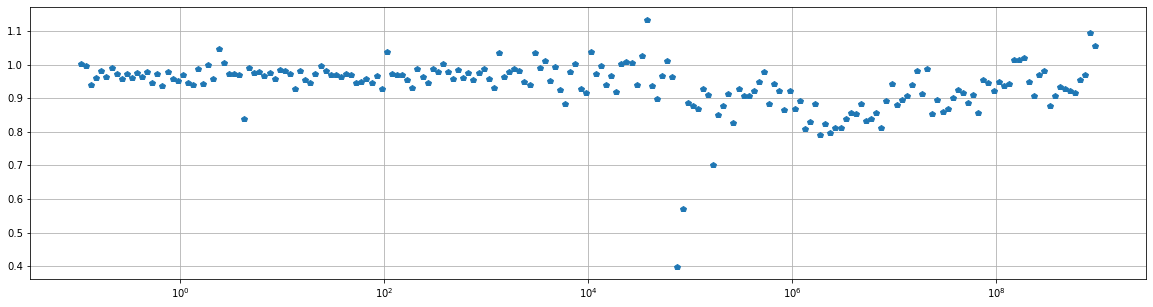

In [46]:
plt.figure(figsize=(20,5))
plt.errorbar(x_tof, tr_low, fmt="p")
plt.xscale('log')
plt.grid()

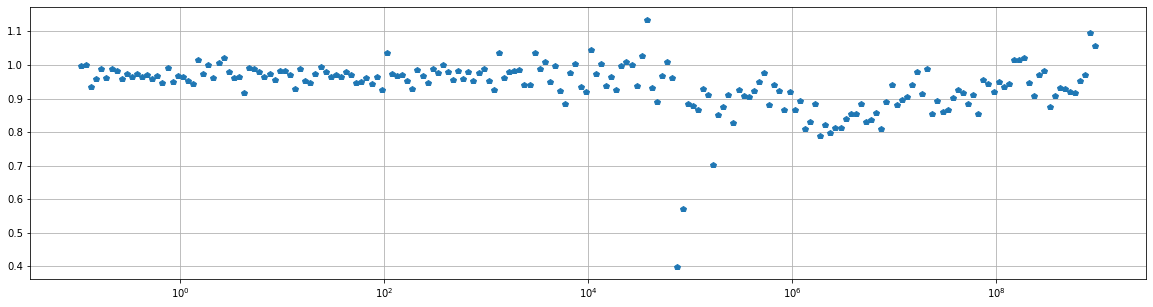

In [47]:
plt.figure(figsize=(20,5))
plt.errorbar(x_tof, tr_mid, fmt="p")
plt.xscale('log')
plt.grid()

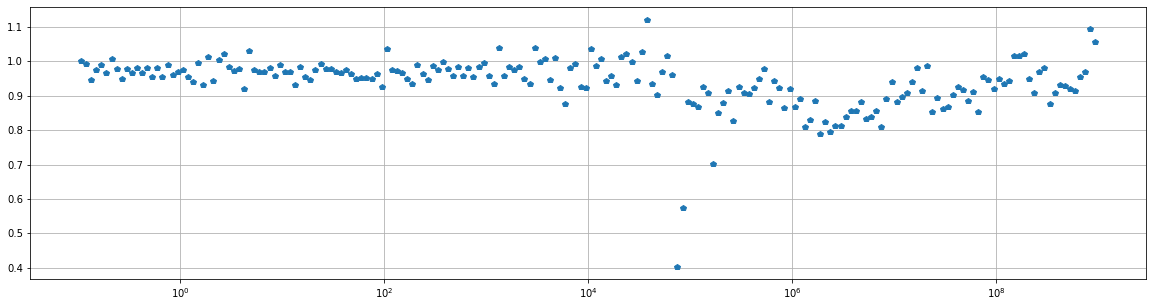

In [48]:
plt.figure(figsize=(20,5))
plt.errorbar(x_tof, tr_high, fmt="p")
plt.xscale('log')
plt.grid()

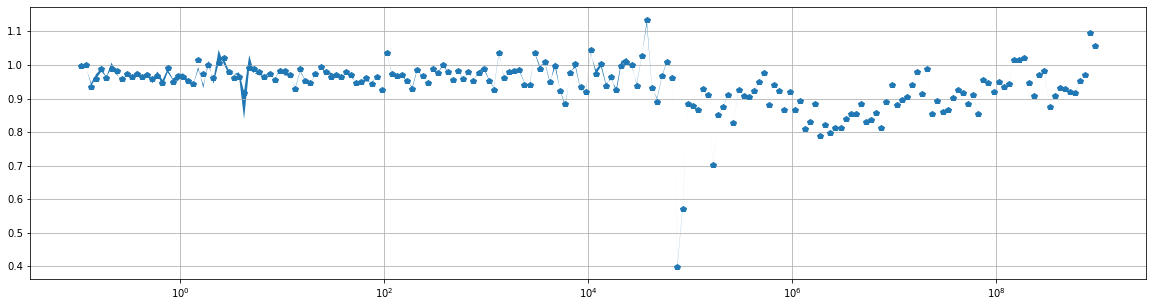

In [51]:
plt.figure(figsize=(20,5))
plt.errorbar(x_tof, tr_mid, fmt="p")
plt.fill_between(x_tof, tr_low, tr_high)
plt.xscale('log')
plt.grid()

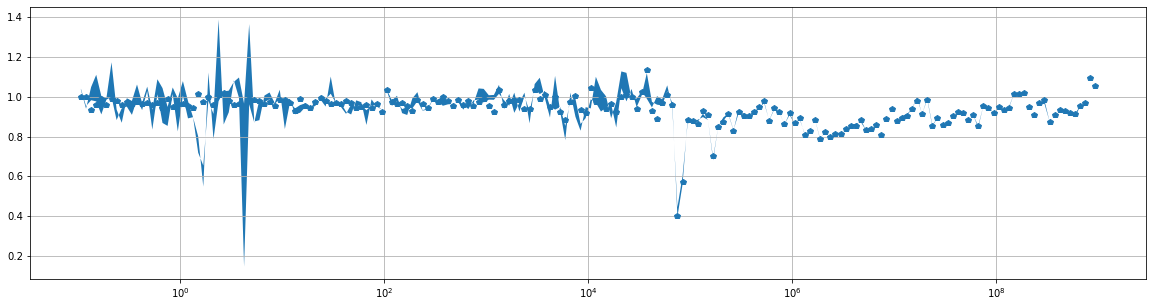

In [64]:
plt.figure(figsize=(20,5))
plt.errorbar(x_tof, tr_mid, fmt="p")
plt.fill_between(x_tof, tr_mid - 10 * (tr_mid - tr_low) , tr_mid + 10 * (tr_high - tr_mid))
plt.xscale('log')
plt.grid()

In [53]:
en_ArIn_select_mid_short = tof_to_energy(tof_ArIn_select_mid / 1e9, 182.3-0.042, 939.56542, 299792458) * 1e6
en_ArIn_select_mid_long = tof_to_energy(tof_ArIn_select_mid / 1e9, 182.3+0.042, 939.56542, 299792458) * 1e6
en_ArOut_select_mid_short = tof_to_energy(tof_ArOut_select_mid / 1e9, 182.3-0.042, 939.56542, 299792458) * 1e6
en_ArOut_select_mid_long = tof_to_energy(tof_ArOut_select_mid / 1e9, 182.3+0.042, 939.56542, 299792458) * 1e6

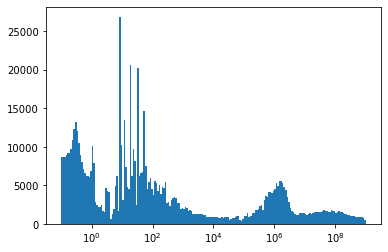

In [54]:
hist_ArIn_mid_short, bins_ArIn_mid_short, _ = plt.hist(en_ArIn_select_mid_short, bins = logbins, range = (0, 1e9))
plt.xscale('log')

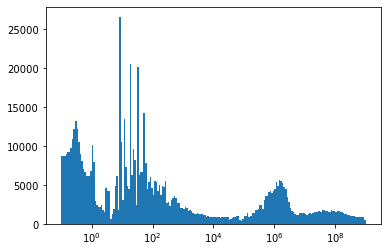

In [55]:
hist_ArIn_mid_long, bins_ArIn_mid_long, _ = plt.hist(en_ArIn_select_mid_long, bins = logbins, range = (0, 1e9))
plt.xscale('log')

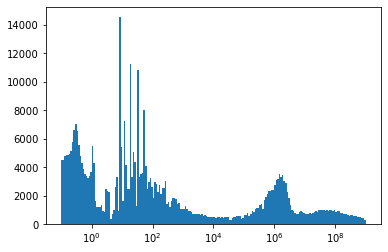

In [56]:
hist_ArOut_mid_short, bins_ArOut_mid_short, _ = plt.hist(en_ArOut_select_mid_short, bins = logbins, range = (0, 1e9))
plt.xscale('log')

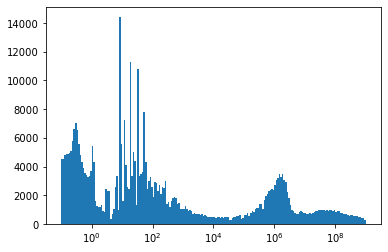

In [57]:
hist_ArOut_mid_long, bins_ArOut_mid_long, _ = plt.hist(en_ArOut_select_mid_long, bins = logbins, range = (0, 1e9))
plt.xscale('log')

In [58]:
error_ArIn_mid_short = np.sqrt(hist_ArIn_mid_short)
error_ArIn_mid_short[error_ArIn_mid_short == 0] = 0.7
error_ArIn_mid = np.sqrt(hist_ArIn_mid)
error_ArIn_mid[error_ArIn_mid == 0] = 0.7
error_ArIn_mid_long = np.sqrt(hist_ArIn_mid_long)
error_ArIn_mid_long[error_ArIn_mid_long == 0] = 0.7

In [59]:
tr_mid_short, tr_error_mid_short = transmission(hist_ArIn_mid_short / norm_ArIn_mid, error_ArIn_mid_short / norm_ArIn_mid, hist_ArOut_mid_short / norm_ArOut_mid, np.sqrt(hist_ArOut_mid_short) / norm_ArOut_mid)
tr_mid, tr_error_mid = transmission(hist_ArIn_mid / norm_ArIn_mid, error_ArIn_mid / norm_ArIn_mid, hist_ArOut_mid / norm_ArOut_mid, np.sqrt(hist_ArOut_mid) / norm_ArOut_mid)
tr_mid_long, tr_error_mid_long = transmission(hist_ArIn_mid_long / norm_ArIn_mid, error_ArIn_mid_long / norm_ArIn_mid, hist_ArOut_mid_long / norm_ArOut_mid, np.sqrt(hist_ArOut_mid_long) / norm_ArOut_mid)

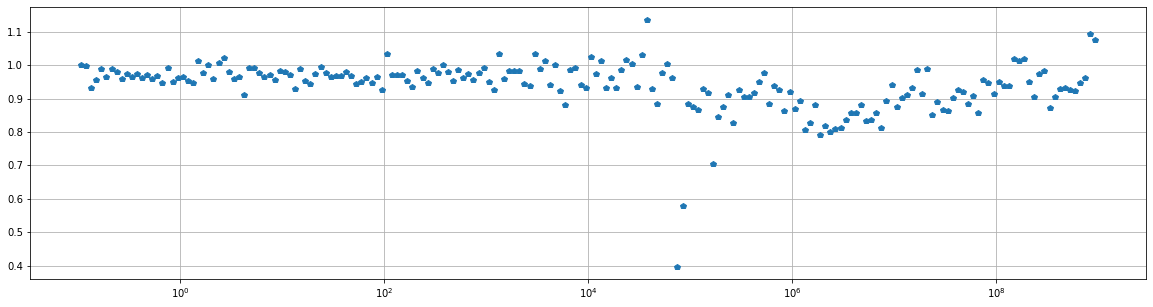

In [60]:
plt.figure(figsize=(20,5))
plt.errorbar(x_tof, tr_mid_short, fmt="p")
plt.xscale('log')
plt.grid()

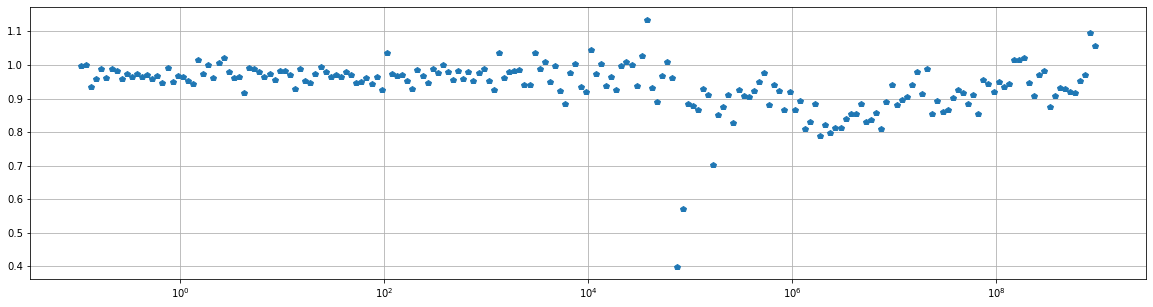

In [61]:
plt.figure(figsize=(20,5))
plt.errorbar(x_tof, tr_mid, fmt="p")
plt.xscale('log')
plt.grid()

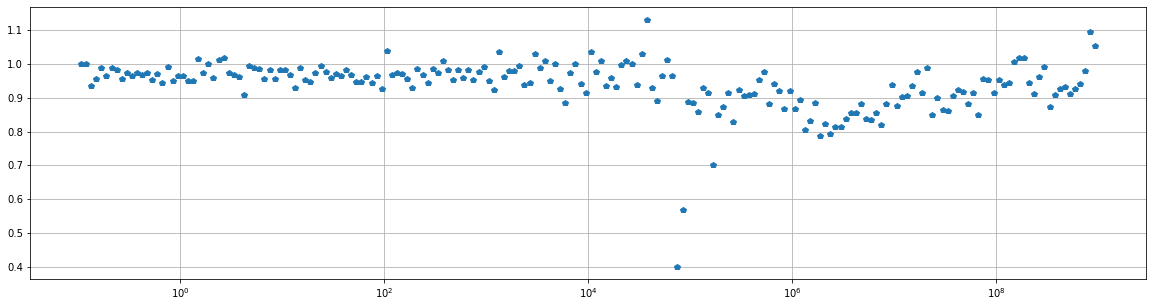

In [62]:
plt.figure(figsize=(20,5))
plt.errorbar(x_tof, tr_mid_long, fmt="p")
plt.xscale('log')
plt.grid()

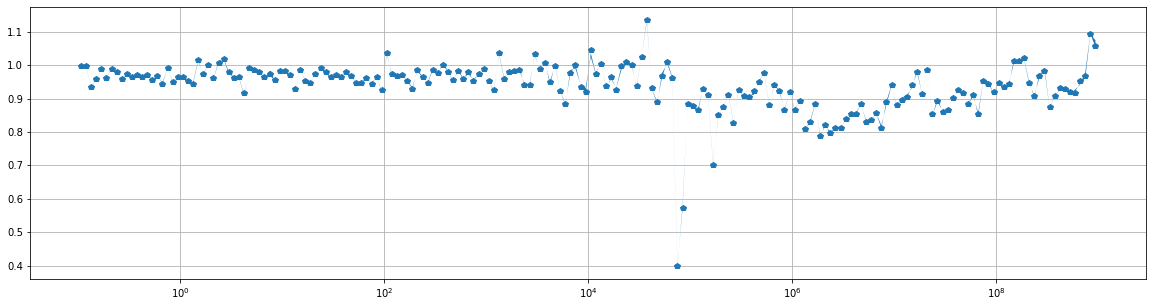

In [63]:
plt.figure(figsize=(20,5))
plt.errorbar(x_tof, tr_mid, fmt="p")
plt.fill_between(x_tof, tr_mid_short, tr_mid_long)
plt.xscale('log')
plt.grid()

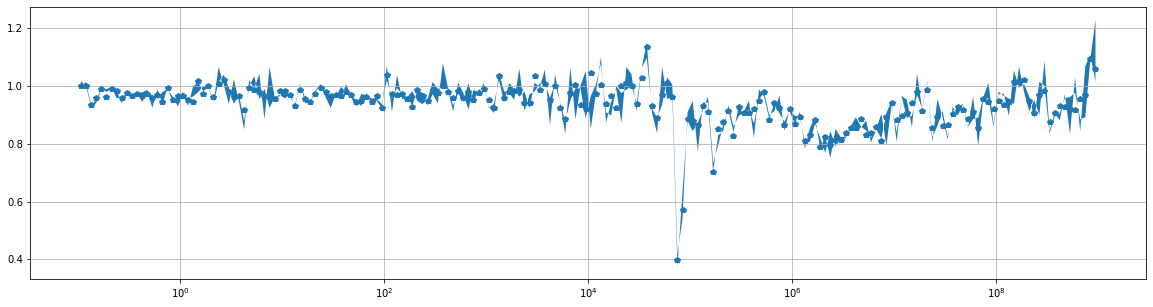

In [65]:
plt.figure(figsize=(20,5))
plt.errorbar(x_tof, tr_mid, fmt="p")
plt.fill_between(x_tof, tr_mid - 10 * (tr_mid - tr_mid_short), tr_mid + 10 * (tr_mid_long - tr_mid))
plt.xscale('log')
plt.grid()